In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('data/train.csv')

In [7]:
df.isna().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [23]:
df.Claim.value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [5]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [6]:
df['Agency Type'].value_counts()

Travel Agency    34996
Airlines         17314
Name: Agency Type, dtype: int64

In [11]:
df['Destination'].value_counts()

SINGAPORE       14242
THAILAND         4562
MALAYSIA         4359
CHINA            3909
AUSTRALIA        3011
                ...  
BHUTAN              2
BERMUDA             2
BELARUS             2
ZAMBIA              1
TURKMENISTAN        1
Name: Destination, Length: 97, dtype: int64

In [16]:
for column in ['Agency','Agency Type','Distribution Channel','Product Name','Destination']:
    df = pd.concat((df,pd.get_dummies(df[column])),1)
    df.drop(column,1,inplace = True)
df

,ID,Duration,Net Sales,Commision (in value),Age,Claim,ADM,ART,C2B,CBH,...,TURKMENISTAN,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,ZAMBIA
0,2010,61,12.000000,0.0000,41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4245,4,17.000000,0.0000,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9251,26,19.800000,11.8800,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4754,15,27.000000,0.0000,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8840,15,37.000000,0.0000,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,365,444.750593,111.1858,40,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52306,5282,8,23.000000,9.2000,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52307,7083,38,61.100000,15.2800,37,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52308,8523,2,10.000000,0.0000,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.drop('ID',1,inplace = True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [30]:

X = df.drop('Claim',1)
y = df.Claim

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.939686484419805

In [32]:
precision_score(y_test, pred)

0.837492391965916

In [33]:
recall_score(y_test, pred)

0.7908045977011494

In [35]:
confusion_matrix(y_test, pred)

array([[8455,  267],
       [ 364, 1376]])

In [36]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.9678825418674007

In [40]:
precision_score(y_test, pred)

0.9573873168549379

In [41]:
recall_score(y_test, pred)

0.9795171072205058

In [42]:
confusion_matrix(y_test, pred)

array([[8316,  381],
       [ 179, 8560]])

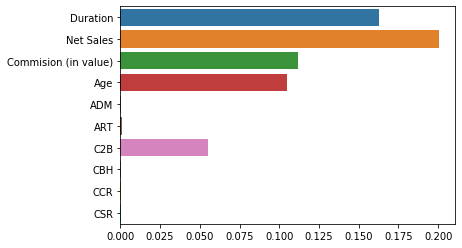

In [46]:
sns.barplot(x = model.feature_importances_[:10], y = X.columns[:10])

In [47]:
model.feature_importances_[:10]

array([1.62835162e-01, 2.00604544e-01, 1.12003787e-01, 1.05088819e-01,
       2.91182639e-04, 1.14032343e-03, 5.48647156e-02, 1.11800160e-04,
       2.45486149e-04, 1.18776994e-04])

1. Duration: Is it months, days or something else?
2. Net Sales: 12 what? millions, thousands? Whats the currency? Same with commission.

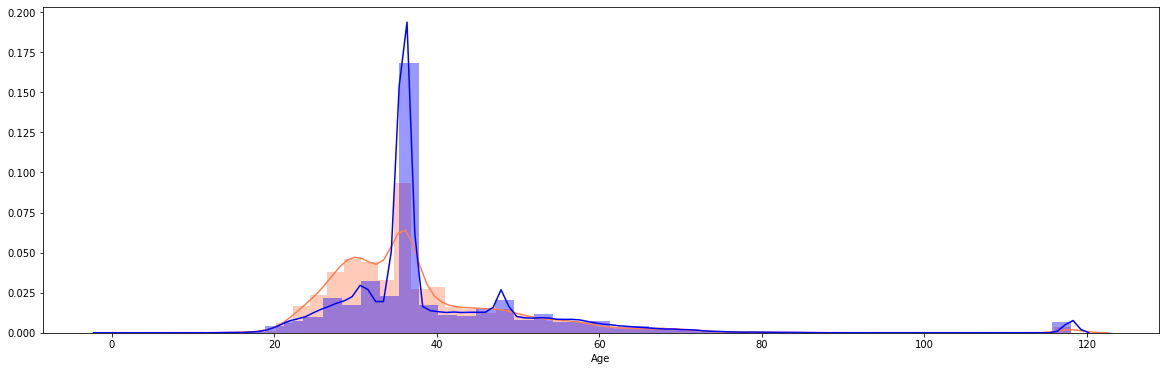

In [34]:
plt.figure(figsize = (20,6))
sns.distplot(df[df.Claim == 1].Age, color = 'coral')
sns.distplot(df[df.Claim == 0].Age, color = 'blue')


In [38]:
df.Destination.nunique()

97